<a href="https://colab.research.google.com/github/SisekoC/My-Notebooks/blob/main/Lung_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Lung Disease Detection</center>


## Overview:
Lung diseases constitute a diverse spectrum of respiratory conditions that affect millions of individuals worldwide. Ranging from acute infections like pneumonia to chronic ailments such as asthma, chronic obstructive pulmonary disease (COPD), and lung cancer, these disorders significantly impact both physical health and overall well-being. Risk factors encompass a broad array, including smoking, environmental pollutants, occupational exposures, and genetic predispositions. Diagnosis typically involves a comprehensive evaluation, incorporating medical history, physical examinations, and various diagnostic tests like imaging and pulmonary function assessments. Effective management strategies, tailored to the specific disease and individual circumstances, are essential for mitigating symptoms, improving quality of life, and reducing morbidity and mortality associated with lung diseases.

Types of Things We've taken for Detection:
* Viral Pneumonia
* Bacterial Pneumonia
* Covid Virus
* Normal
* Tuberculosis

## Dataset Information:

Lung X-Rays Dataset: [Kaggle - Lung Disease Detection](https://www.kaggle.com/datasets/omkarmanohardalvi/lungs-disease-dataset-4-types)

This dataset of size 2.3GB contains 10,100 images of human chest x-ray scan images which are classified into 5 classes: Viral Pneumonia, Bacterial Pneumonia, Covid, Normal and Tuberculosis

### Training Data:

* Viral Pneumonia : 1204 Images
* Bacterial Pneumonia : 1205 Images
* Covid Virus : 1218 Images
* Normal : 1207 Images
* Tuberculosis : 1220 Images
   
### Testing Data:

* Viral Pneumonia : 403 Images
* Bacterial Pneumonia : 403 Images
* Covid Virus : 407 Images
* Normal : 404 Images
* Tuberculosis : 408 Images
    
 ### Validation Data:

* Viral Pneumonia : 401 Images
* Bacterial Pneumonia : 401 Images
* Covid Virus : 406 Images
* Normal : 402 Images
* Tuberculosis : 406 Images

In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpi
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!kaggle datasets download -d omkarmanohardalvi/lungs-disease-dataset-4-types

Dataset URL: https://www.kaggle.com/datasets/omkarmanohardalvi/lungs-disease-dataset-4-types
License(s): unknown
100% 2.02G/2.02G [00:28<00:00, 130MB/s]
100% 2.02G/2.02G [00:28<00:00, 75.0MB/s]


In [4]:
!unzip lungs-disease-dataset-4-types

Streaming output truncated to the last 5000 lines.
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0673-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0675-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0678-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0680-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0682-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0683-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0684-0001-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0686-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0690-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0692-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0693-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0695-0001.jpeg  
  inflating: Lung Disease Dataset/train/Norm

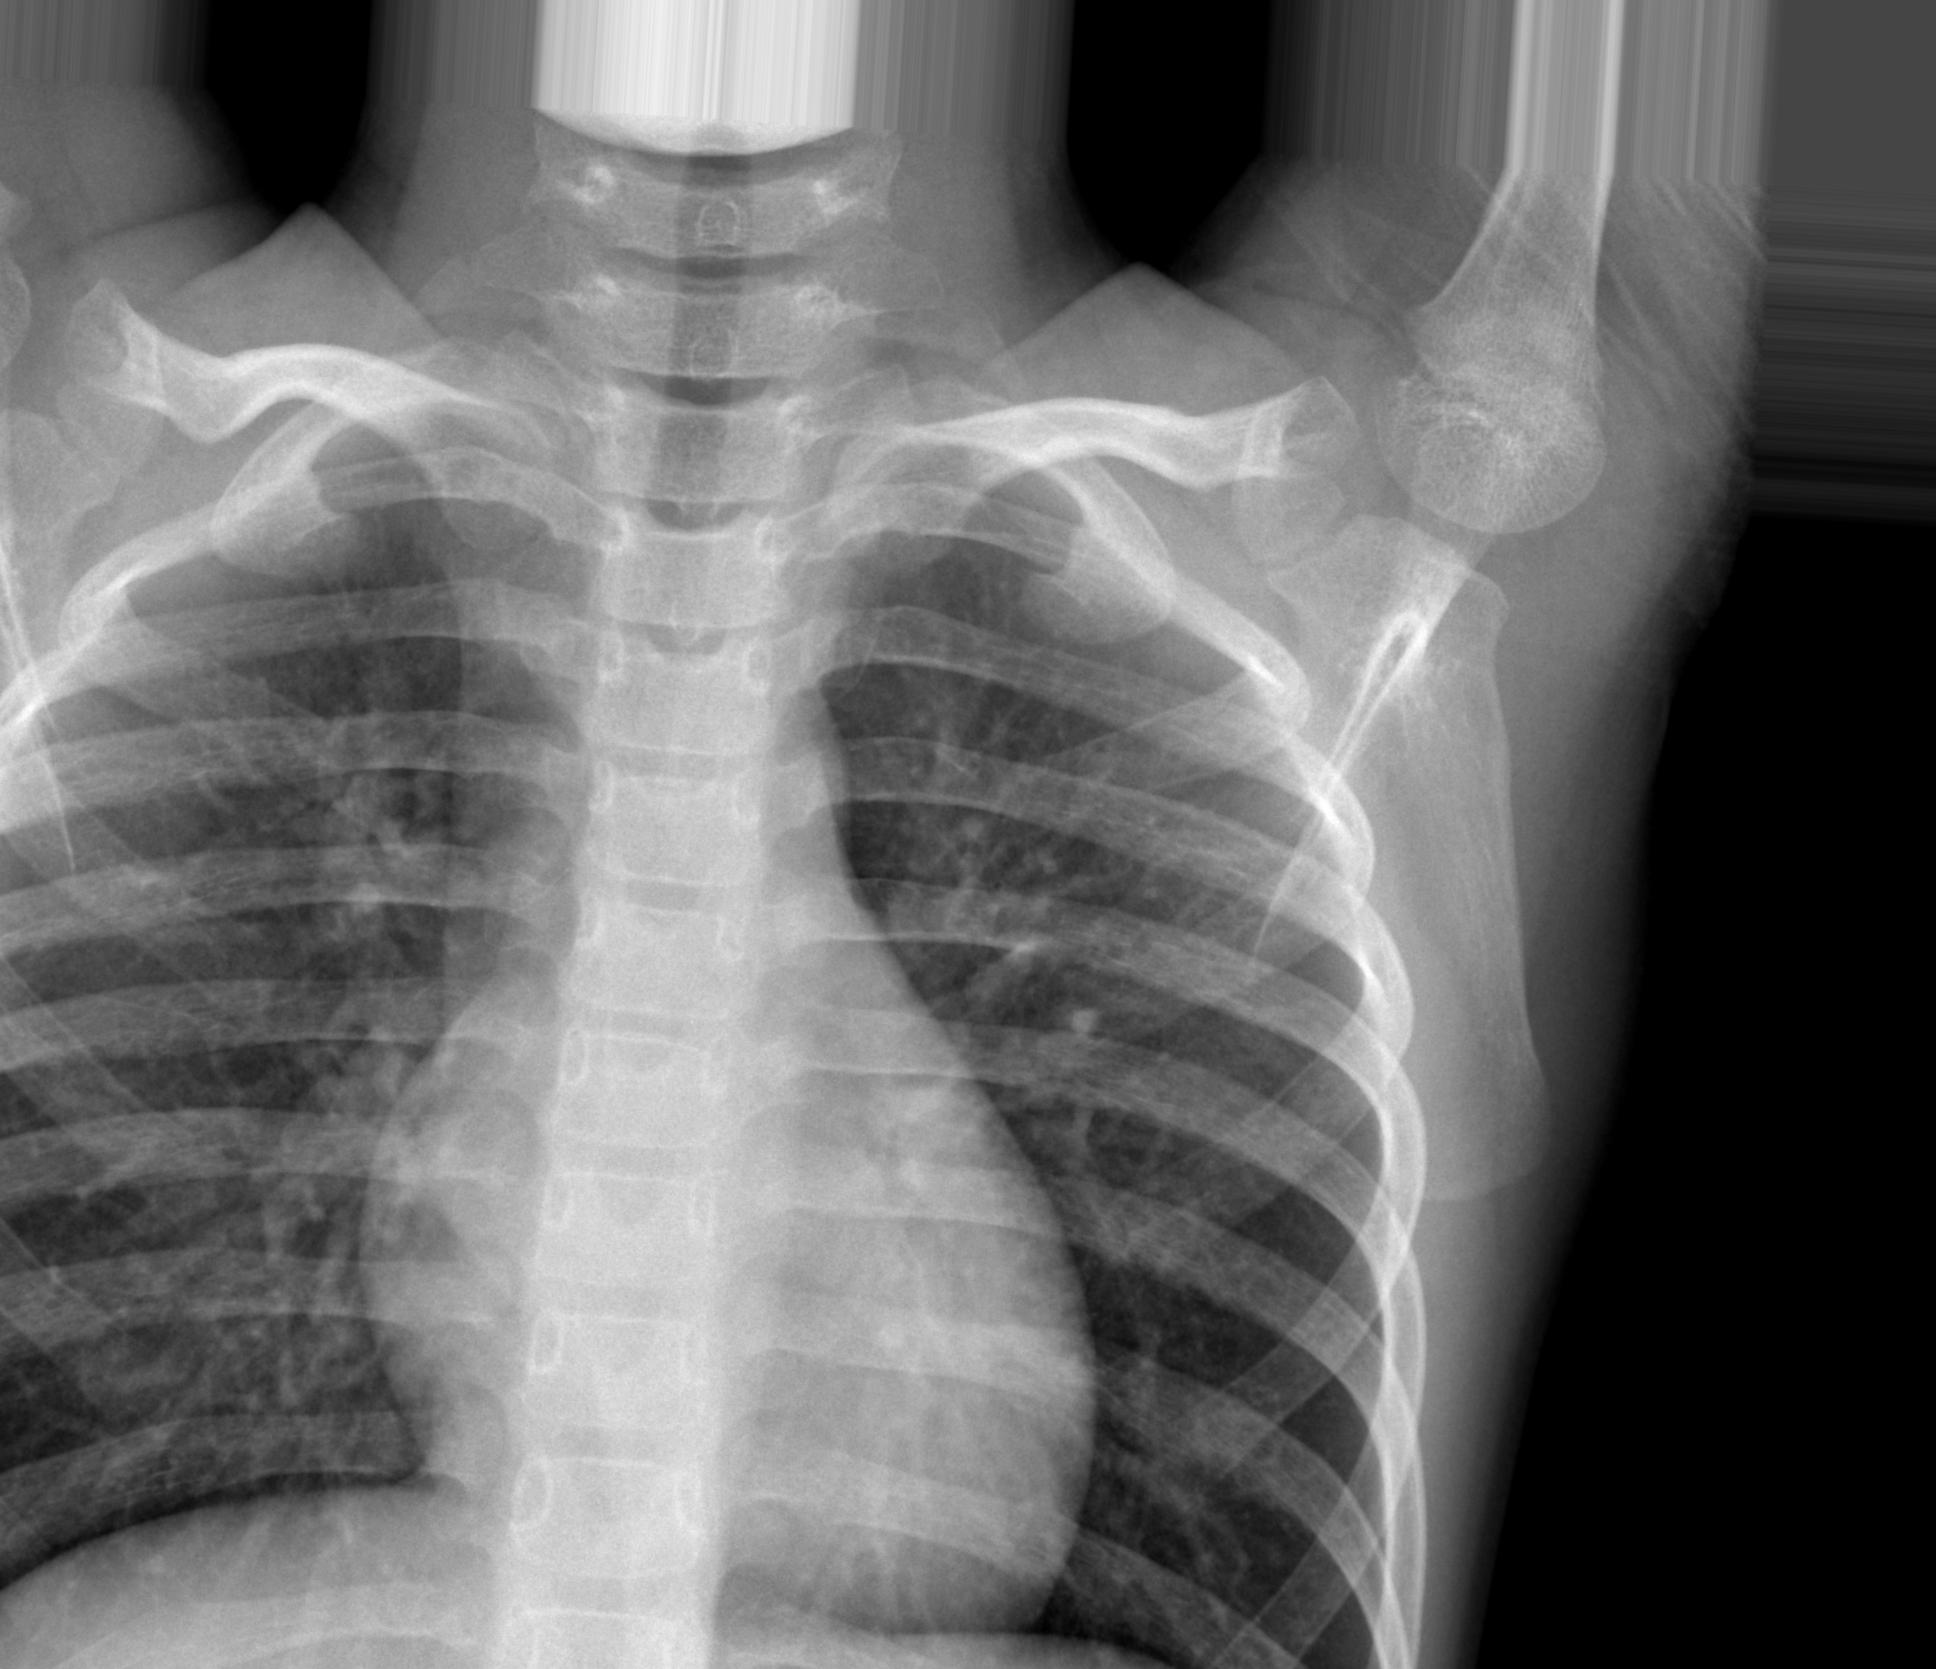

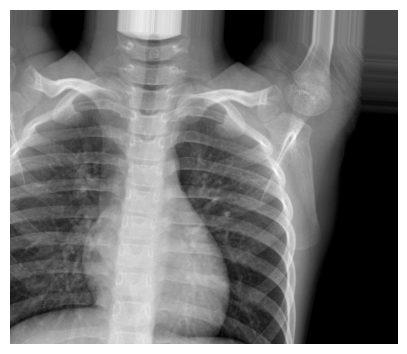

In [14]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Load the image
img_path = "Lung Disease Dataset/train/Normal/test_0_9774.jpeg"
img = cv2.imread(img_path)

# Check if the image was loaded successfully
if img is not None:
    # Display the image using cv2_imshow
    cv2_imshow(img)

    # If you want to use matplotlib to display the image, convert the color format
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5, 6))
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes
    plt.show()
else:
    print(f"Error: Unable to load image at {img_path}")


In [15]:
traingen = ImageDataGenerator(rescale= 1./255,
                             width_shift_range=0.2 ,
                             height_shift_range=0.2 ,
                             zoom_range=0.2)
valgen = ImageDataGenerator(rescale= 1./255)
testgen = ImageDataGenerator(rescale= 1./255)

In [16]:
train_it = traingen.flow_from_directory("Lung Disease Dataset/train", target_size = (224, 224))
val_it = traingen.flow_from_directory("Lung Disease Dataset/val", target_size = (224, 224))
test_it = traingen.flow_from_directory("Lung Disease Dataset/test", target_size = (224, 224))

Found 6054 images belonging to 5 classes.
Found 2016 images belonging to 5 classes.
Found 2025 images belonging to 5 classes.


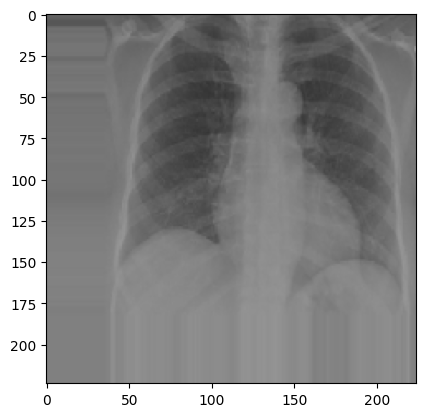

In [17]:
plt.figure()
plt.imshow(next(train_it)[0][0])
plt.show()

In [18]:
base_model_201 = tf.keras.applications.DenseNet201(input_shape = (224, 224, 3),
    include_top=False,
    weights="imagenet"
)

for layer in base_model_201.layers:
  layer.trainable = False

x = layers.Flatten()(base_model_201.output)
x = layers.Dropout(0.5)(x) #
x = layers.Dense(512, activation= 'relu')(x)
x = layers.Dense(5, activation = 'softmax')(x)

densenet_model = tf.keras.models.Model(base_model_201.input, x)
densenet_model.compile('adam', loss = 'categorical_crossentropy',metrics = ['acc'])
densenet_model.summary()

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_0_bn    

 Total params: 66,494,021 (253.65 MB)

 Trainable params: 48,172,037 (183.76 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

In [20]:
Checkpoint = tf.keras.callbacks.ModelCheckpoint("densenet201.best.keras", monitor="val_accuracy", save_best_only= True, mode="max")
reduce_lr = ReduceLROnPlateau(monitor= "val_accuracy", factor= 0.5, patience= 4, verbose= 3,cooldown=2,
                              mode= "max", min_lr= 0.0000001)

In [22]:
densenet_model.fit(train_it, validation_data= val_it, epochs=10, callbacks= [reduce_lr, Checkpoint],
                   steps_per_epoch=60, validation_steps=10)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 50s 769ms/step - acc: 0.7867 - loss: 0.5034 - val_acc: 0.7844 - val_loss: 0.5912 - learning_rate: 0.0010
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 44s 750ms/step - acc: 0.7975 - loss: 0.5157 - val_acc: 0.8125 - val_loss: 0.4779 - learning_rate: 0.0010
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 44s 737ms/step - acc: 0.7956 - loss: 0.5091 - val_acc: 0.8000 - val_loss: 0.4537 - learning_rate: 0.0010
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - acc: 0.7926 - loss: 0.4399 - val_acc: 0.8062 - val_loss: 0.4590 - learning_rate: 0.0010
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 52s 798ms/step - acc: 0.8402 - loss: 0.3688 - val_acc: 0.8125 - val_loss: 0.4981 - learning_rate: 0.0010
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 43s 734ms/step - acc: 0.8148 - loss: 0.4189 - val_acc: 0.8094 - val_loss: 0.4519 - learning_rate: 0.0010
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 40s 676ms/step - acc: 0.8581 - loss: 0.3957 - val_acc: 0.8021 - val_loss: 0.4439 - learning_rate: 0.0010


In [23]:
densenet_model.save('Lung_Model.h5')